<a href="https://colab.research.google.com/github/Karthik01018/-Exploratory-Data-Analysis-EDA-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('/content/Titanic-Dataset.csv')




*Basic Summary Statistics*

In [2]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


 *median explicitly for clarity*

In [3]:
medians = data.median(numeric_only=True)
print("\nMedians:\n", medians)


Medians:
 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


Histograms & Boxplots for Numeric Features

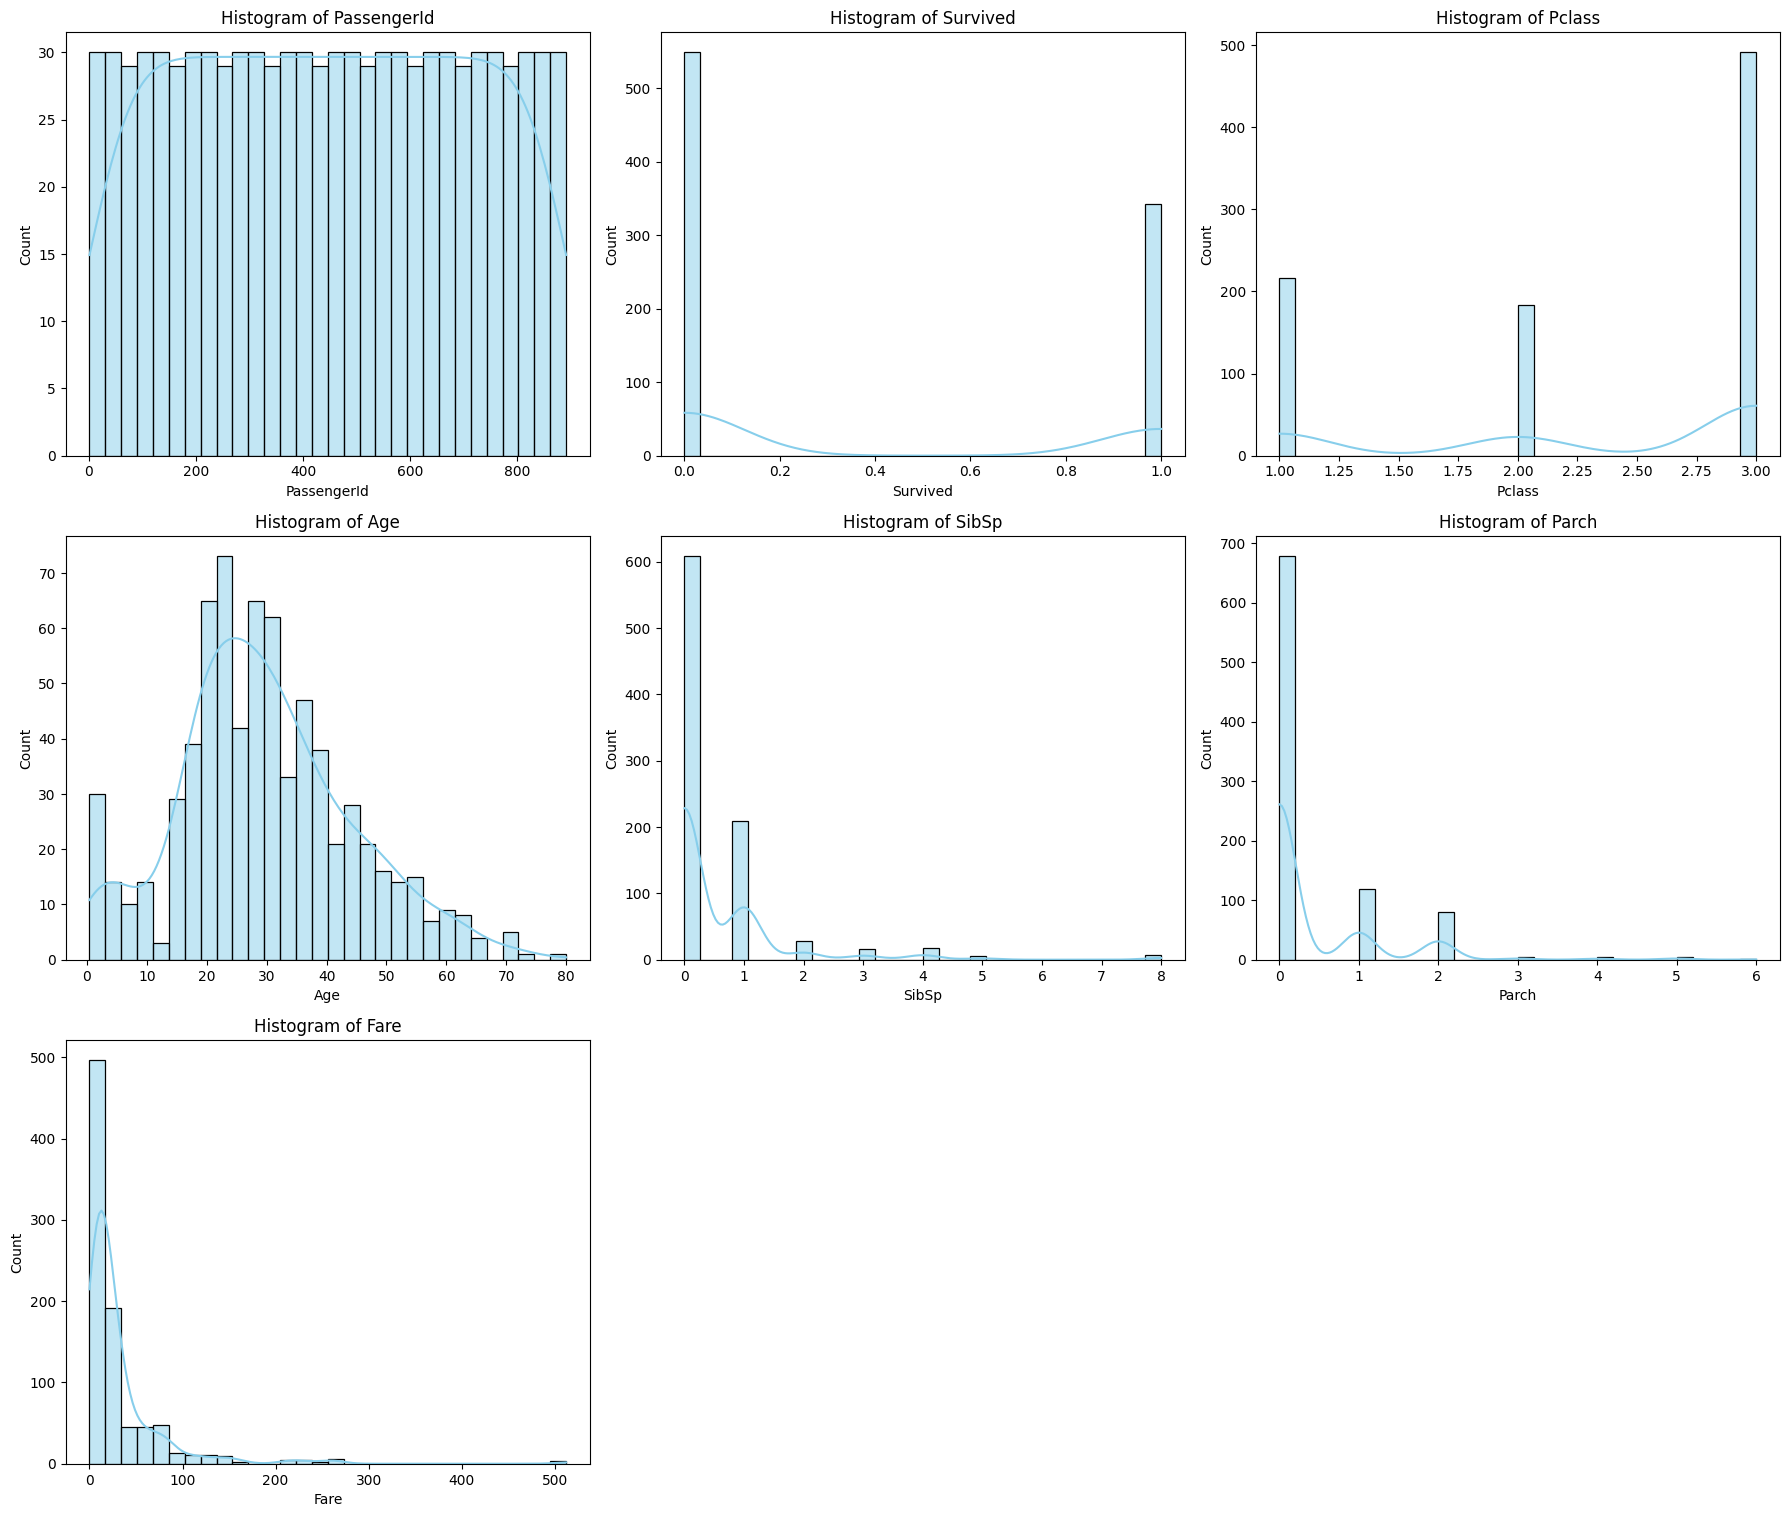

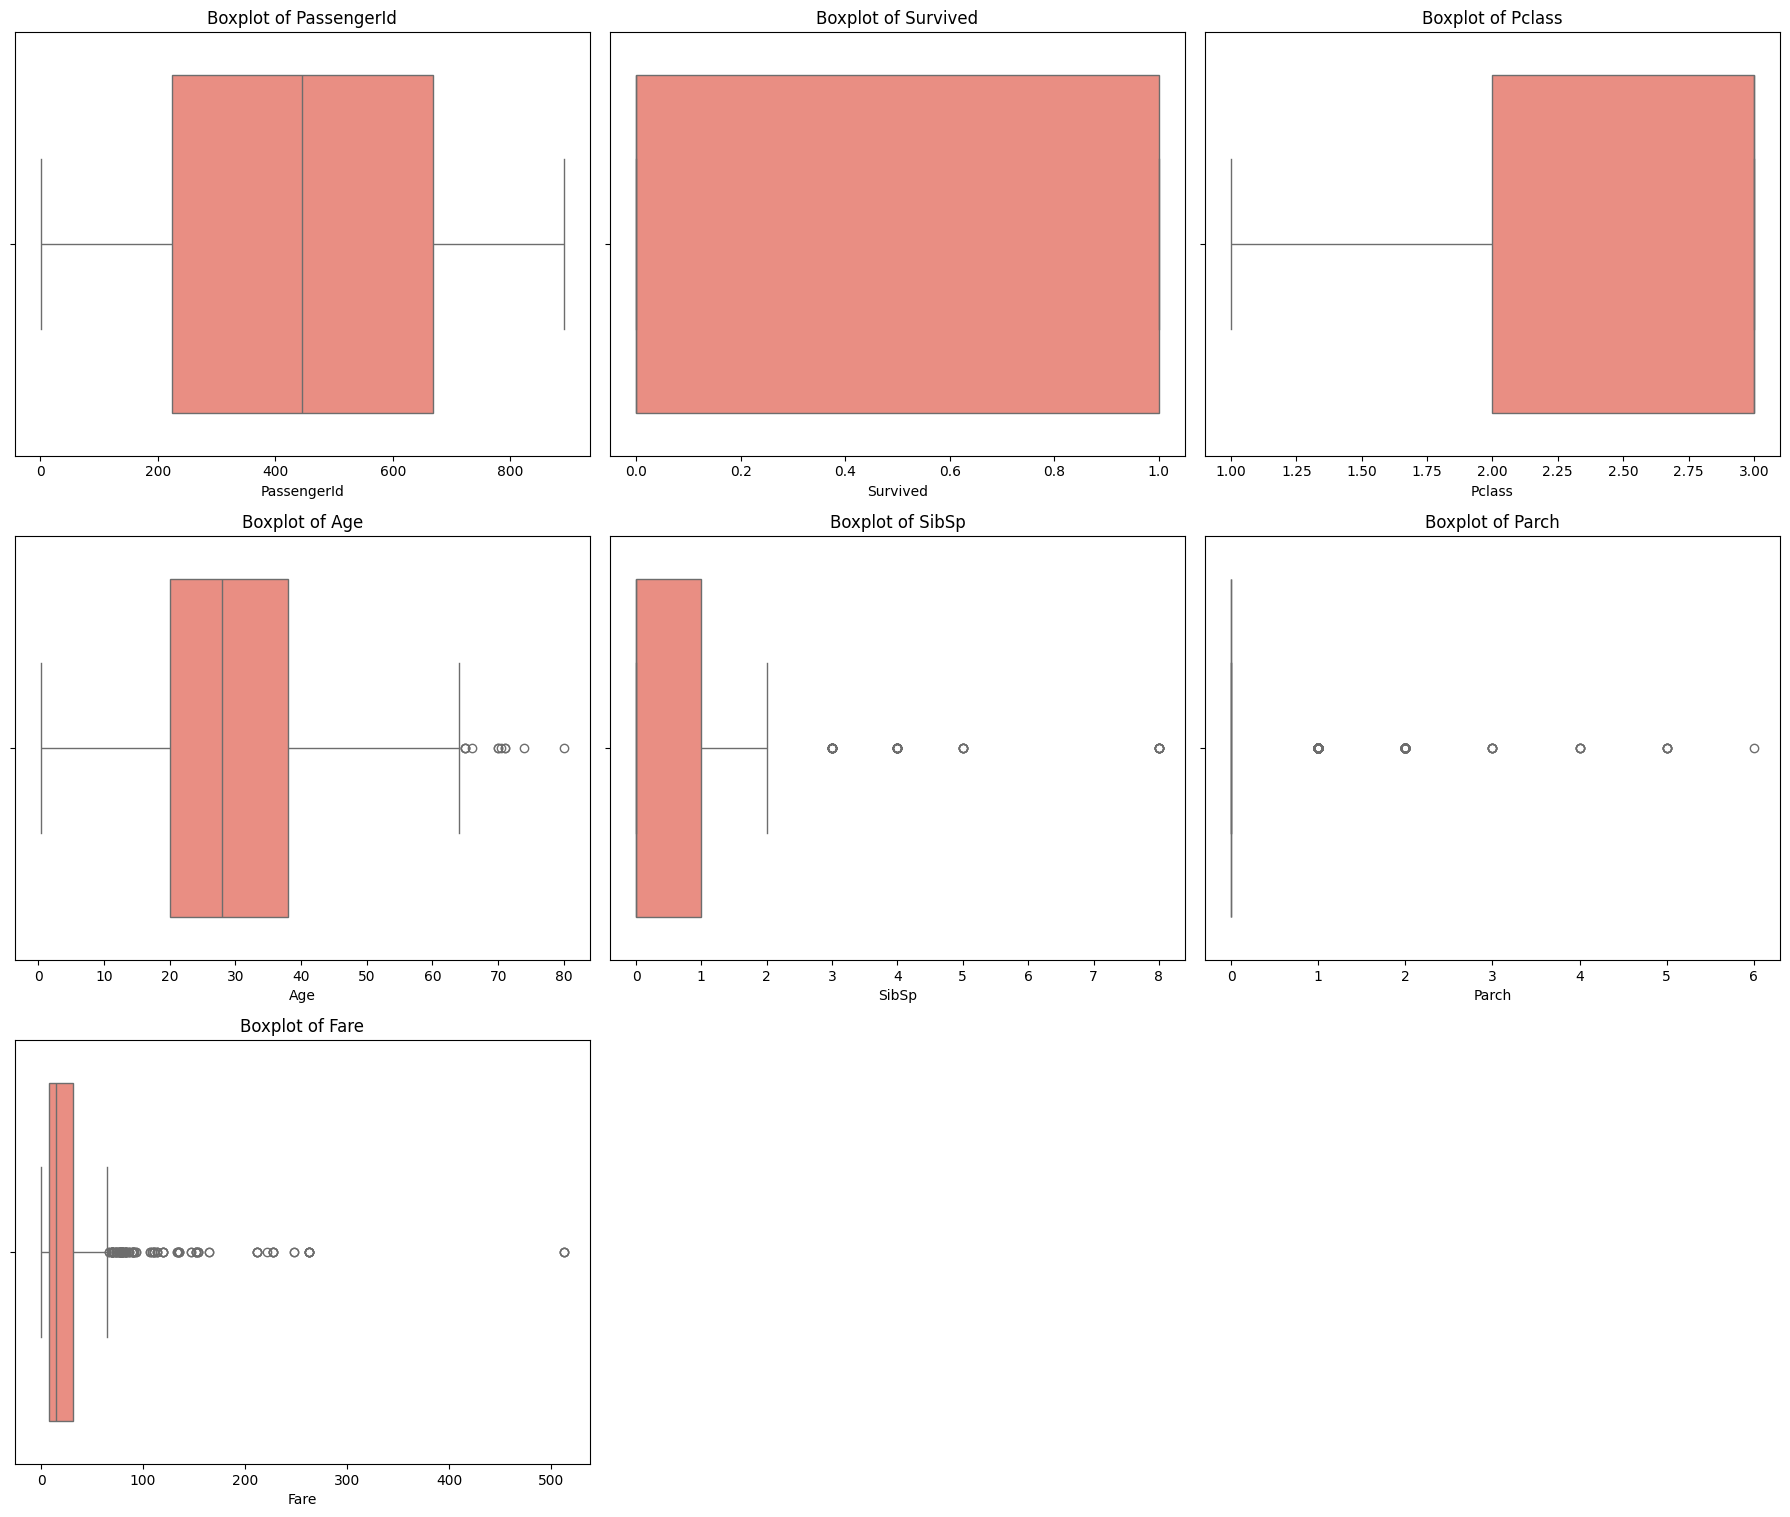

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()


n_cols = 3
n_rows = math.ceil(len(num_cols))

plt.figure(figsize=(n_cols * 6, n_rows * 5))


for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(n_cols * 6, n_rows * 5))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=data[col], color='salmon')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Correlation Matrix with Heatmap

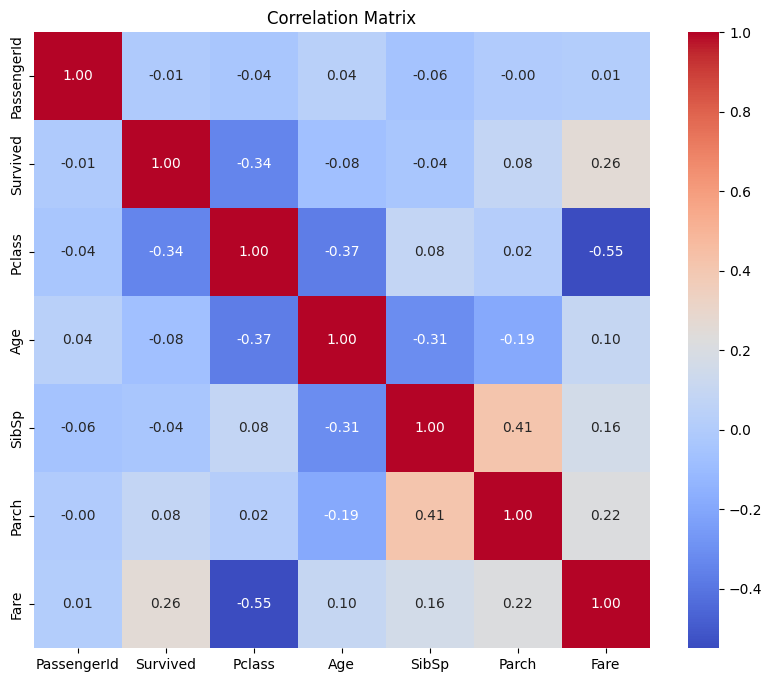

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


Pairplot (for Scatter Relationships)

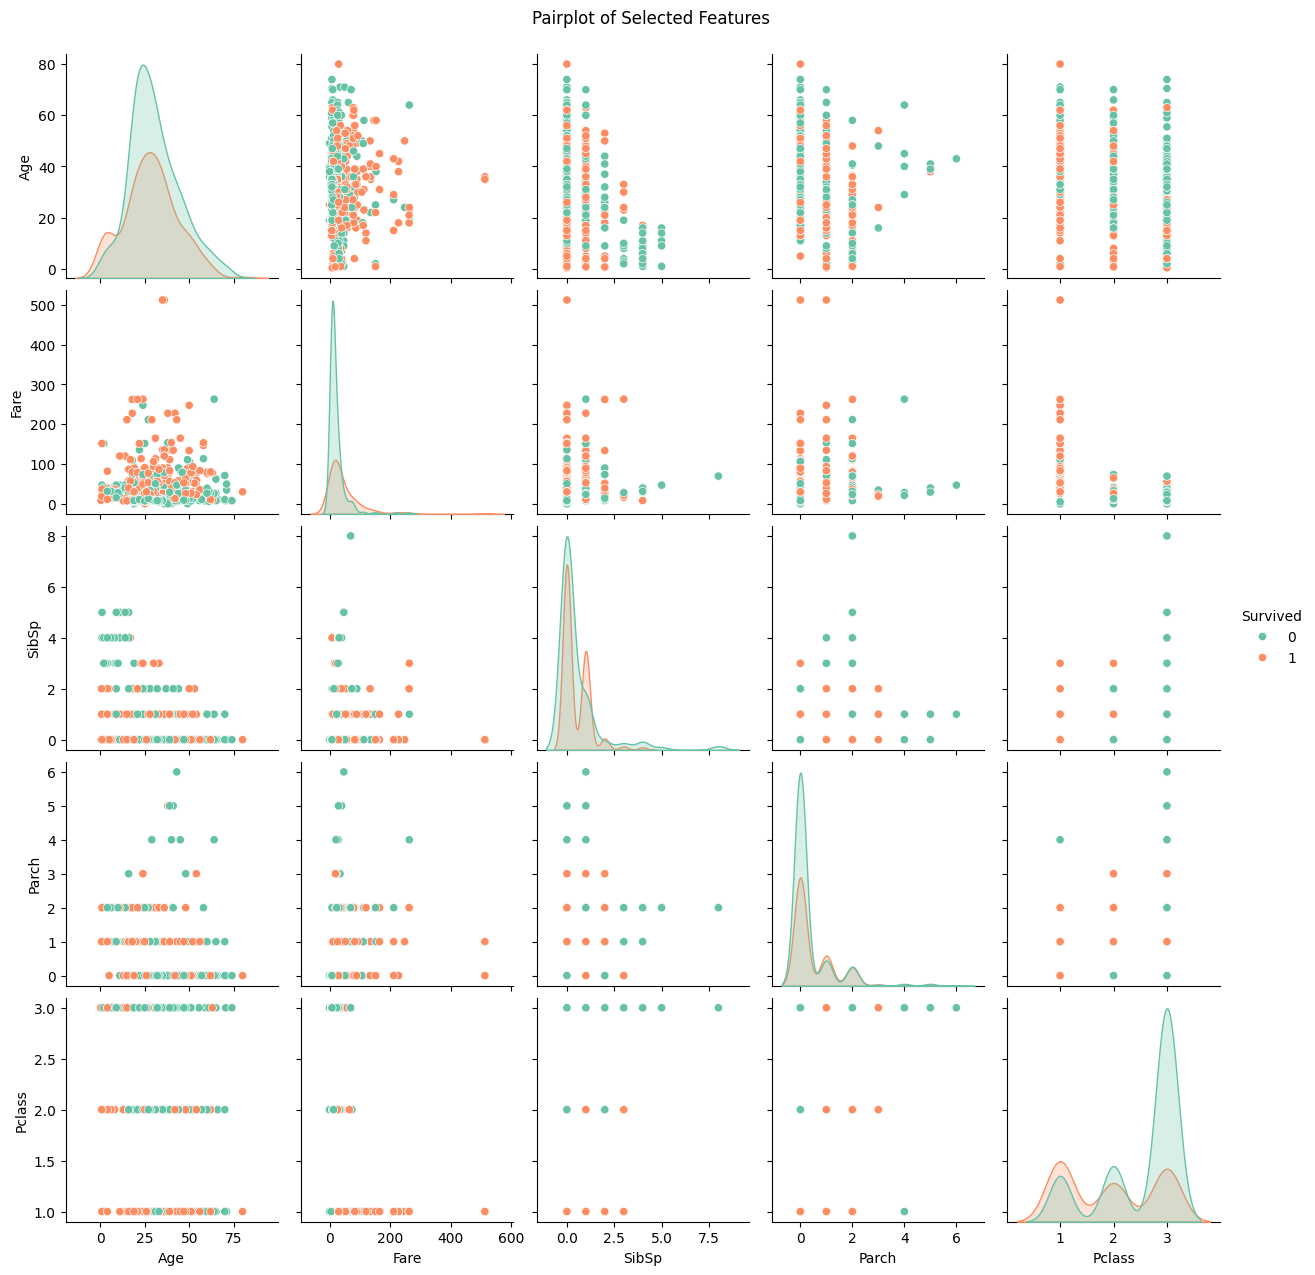

In [6]:

selected_cols = ['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']


sns.pairplot(data[selected_cols], hue='Survived', palette='Set2')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


Identify Patterns


🚻 Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

🏷️ Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

🎂 Survival Rate by Age Group:
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.382682
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64

🛳️ Survival Rate by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


<ipython-input-9-c2fd7c5c3aa5>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('AgeGroup')['Survived'].mean())
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


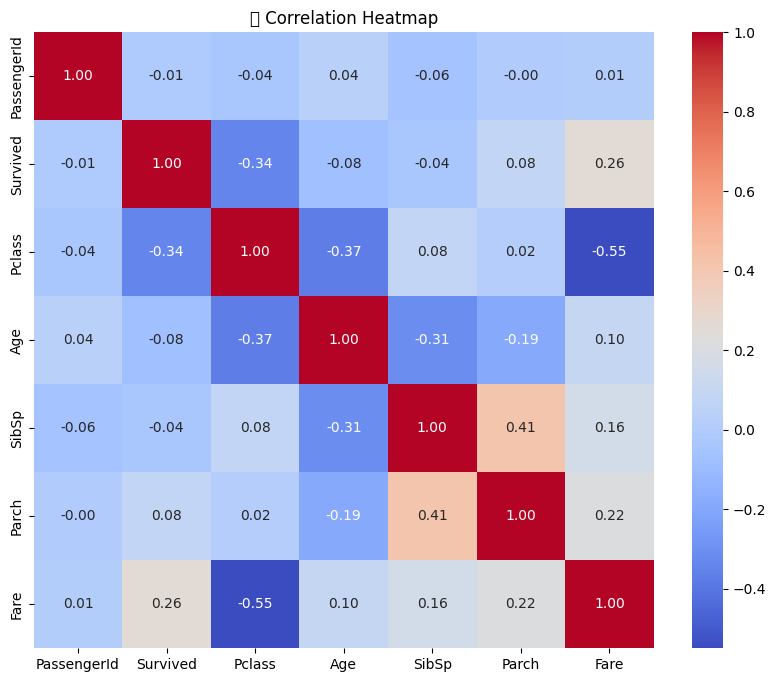

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


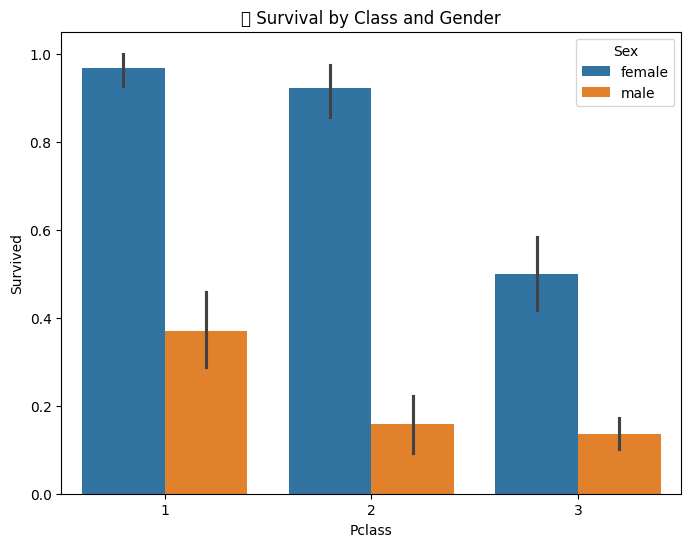

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




print("\n🚻 Survival Rate by Gender:")
print(data.groupby('Sex')['Survived'].mean())

print("\n🏷️ Survival Rate by Class:")
print(data.groupby('Pclass')['Survived'].mean())


data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100],
                          labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
print("\n🎂 Survival Rate by Age Group:")
print(data.groupby('AgeGroup')['Survived'].mean())


print("\n🛳️ Survival Rate by Embarked Port:")
print(data.groupby('Embarked')['Survived'].mean())


plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📈 Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title("🚢 Survival by Class and Gender")
plt.show()



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


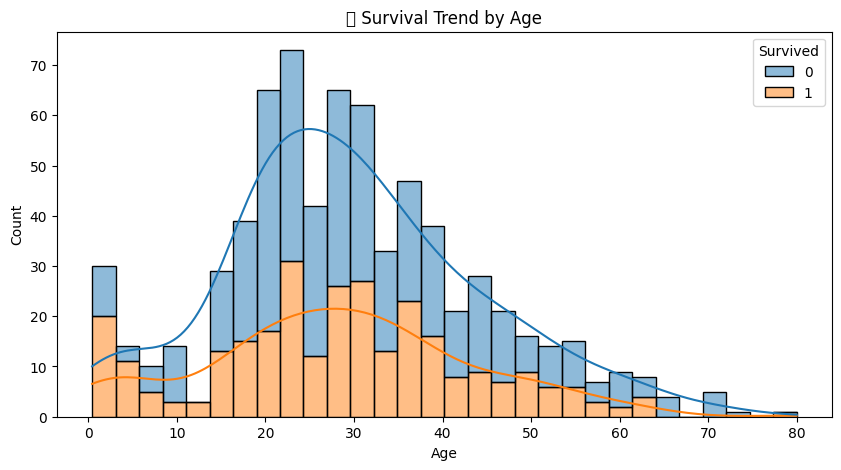

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


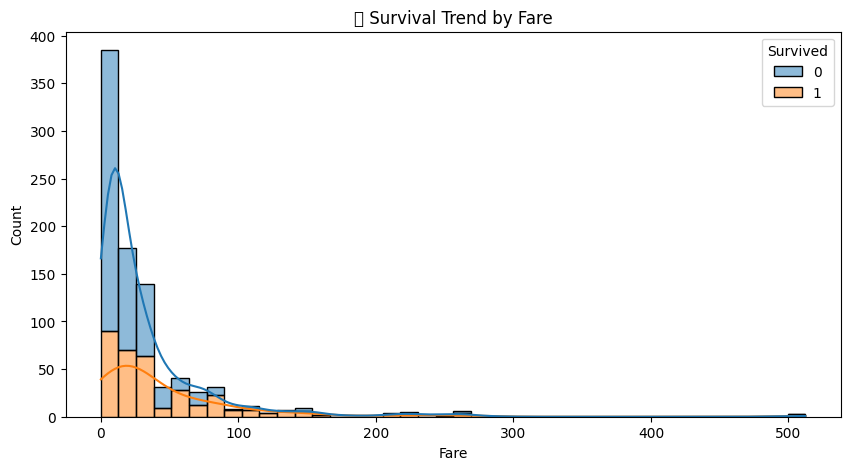

<ipython-input-10-6e7b128d8ea1>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


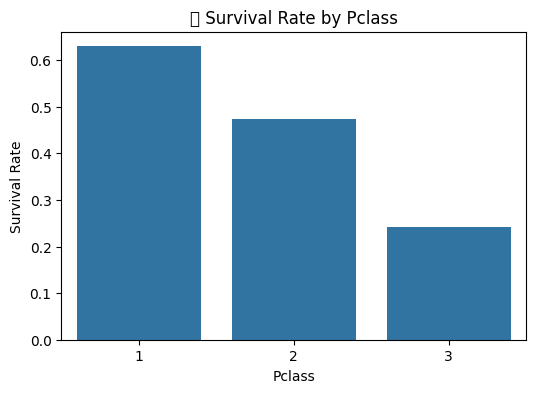

<ipython-input-10-6e7b128d8ea1>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=data, ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128755 (\N{PASSENGER SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


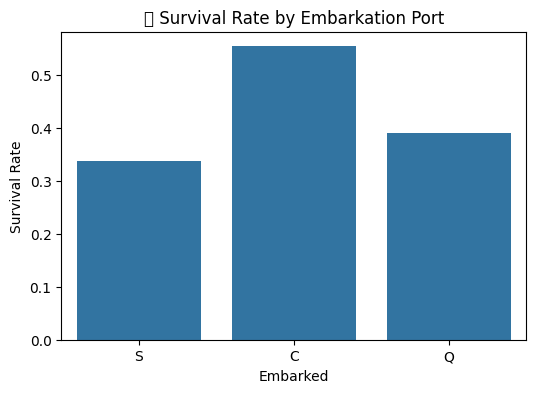

<ipython-input-10-6e7b128d8ea1>:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data, ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128697 (\N{MENS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128698 (\N{WOMENS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


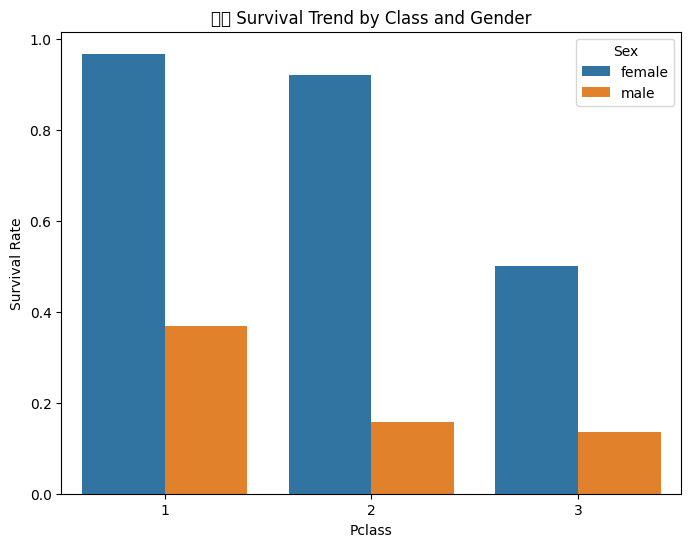

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title("🎂 Survival Trend by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Fare', hue='Survived', bins=40, kde=True, multiple='stack')
plt.title("💰 Survival Trend by Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=data, ci=None)
plt.title("🚢 Survival Rate by Pclass")
plt.ylabel("Survival Rate")
plt.show()


plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=data, ci=None)
plt.title("🛳️ Survival Rate by Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data, ci=None)
plt.title("🚹🚺 Survival Trend by Class and Gender")
plt.ylabel("Survival Rate")
plt.show()


Identify Anomalies

💸 Passengers with Zero or Negative Fare:
      PassengerId  Fare  Pclass  Survived
179          180   0.0       3         0
263          264   0.0       1         0
271          272   0.0       3         1
277          278   0.0       2         0
302          303   0.0       3         0
413          414   0.0       2         0
466          467   0.0       2         0
481          482   0.0       2         0
597          598   0.0       3         0
633          634   0.0       1         0
674          675   0.0       2         0
732          733   0.0       2         0
806          807   0.0       1         0
815          816   0.0       1         0
822          823   0.0       1         0

📈 Outliers in Age: 11 entries
📈 Outliers in Fare: 116 entries


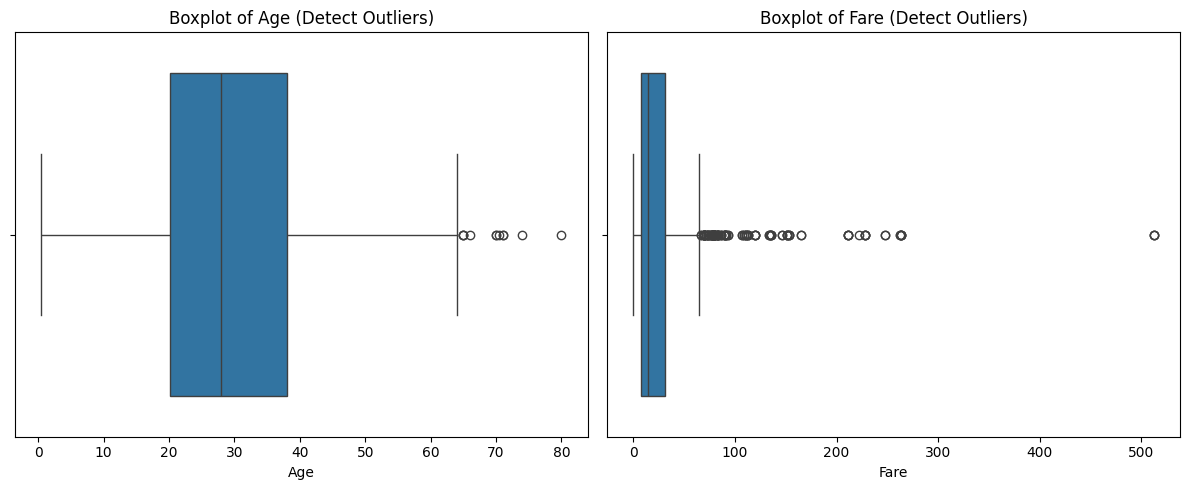


🔠 Unique Embarked values: ['S' 'C' 'Q' nan]
🔠 Unique Sex values: ['male' 'female']


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




zero_fare = data[data['Fare'] <= 0]
print("💸 Passengers with Zero or Negative Fare:\n", zero_fare[['PassengerId', 'Fare', 'Pclass', 'Survived']])


def detect_outliers_iqr(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_age = detect_outliers_iqr('Age')
outliers_fare = detect_outliers_iqr('Fare')

print(f"\n📈 Outliers in Age: {len(outliers_age)} entries")
print(f"📈 Outliers in Fare: {len(outliers_fare)} entries")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age (Detect Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Fare (Detect Outliers)')

plt.tight_layout()
plt.show()


print("\n🔠 Unique Embarked values:", data['Embarked'].unique())
print("🔠 Unique Sex values:", data['Sex'].unique())


Basic feature-level inferences from visuals.


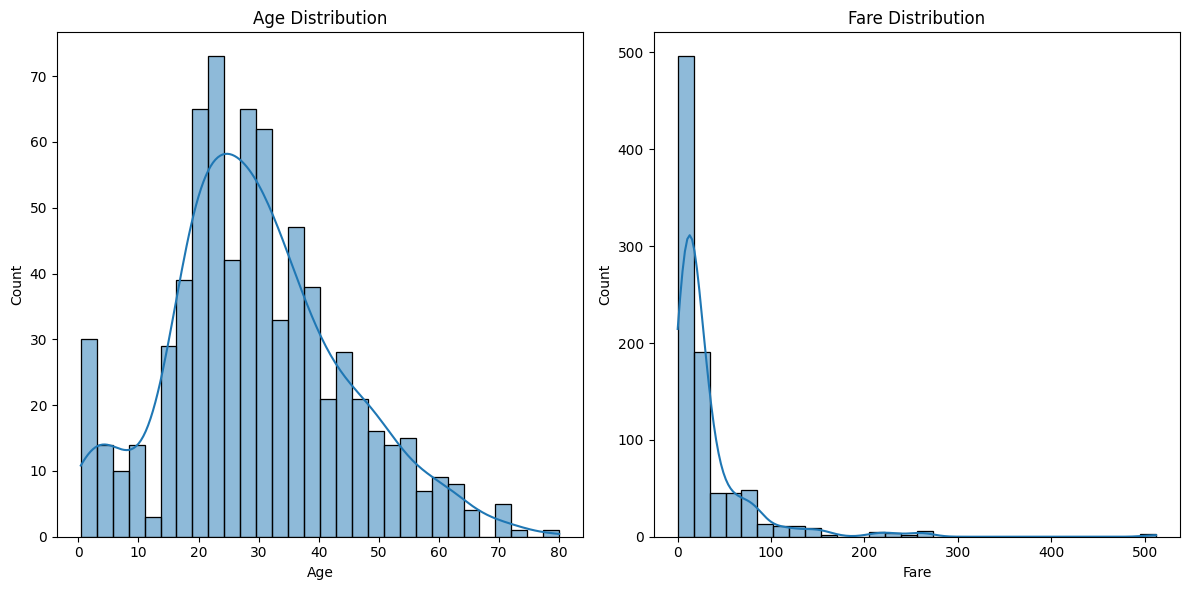

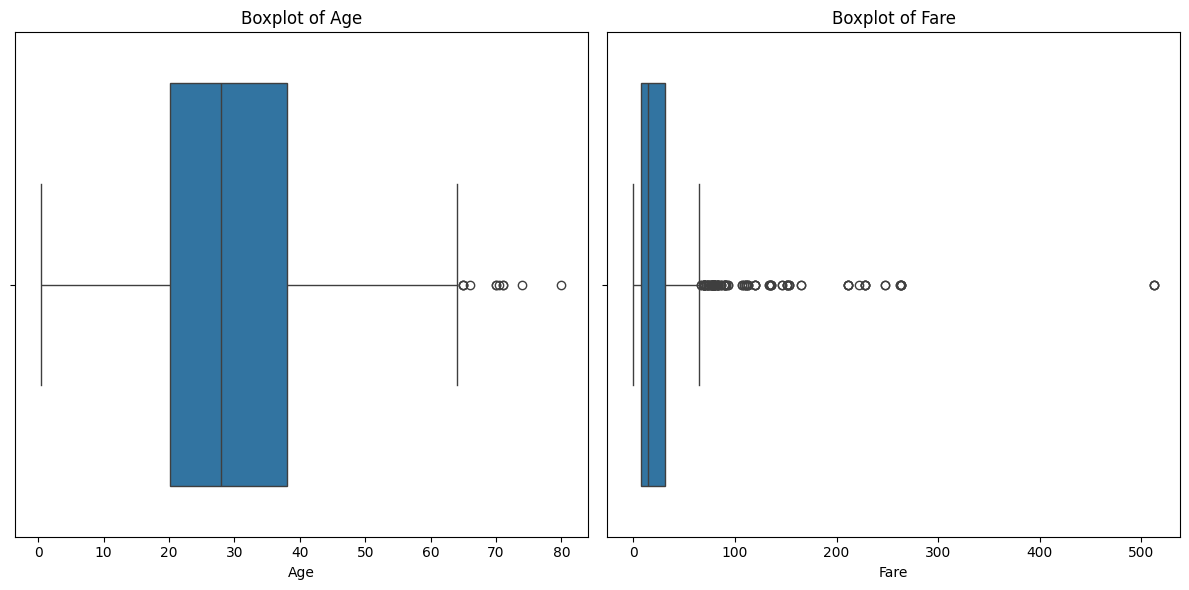

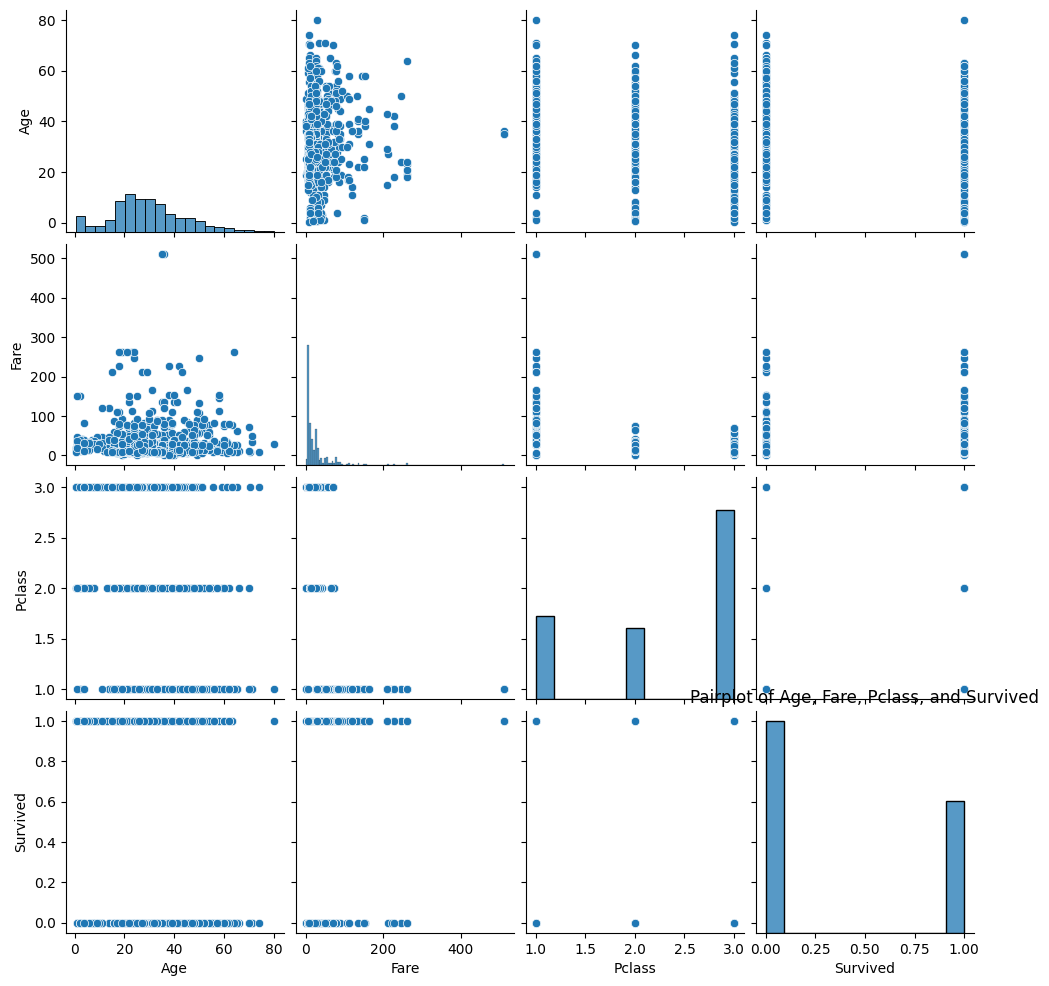

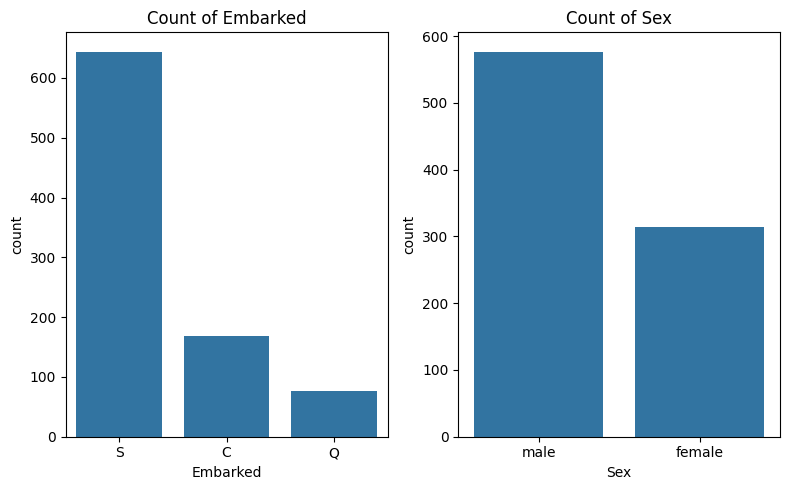

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




def basic_feature_inferences(data):

    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    sns.histplot(data['Age'], kde=True, bins=30)
    plt.title('Age Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(data['Fare'], kde=True, bins=30)
    plt.title('Fare Distribution')

    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=data['Age'])
    plt.title('Boxplot of Age')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data['Fare'])
    plt.title('Boxplot of Fare')

    plt.tight_layout()
    plt.show()


    sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']])
    plt.title('Pairplot of Age, Fare, Pclass, and Survived')
    plt.show()


    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=data['Embarked'])
    plt.title('Count of Embarked')

    plt.subplot(1, 2, 2)
    sns.countplot(x=data['Sex'])
    plt.title('Count of Sex')

    plt.tight_layout()
    plt.show()


basic_feature_inferences(data)
